https://courses.edx.org/courses/course-v1:MITx+15.071x_3+1T2016/courseware/5abd4e9833ed47b2b4eae8827f83d516/aa754f6d17194f3b8a29ec37b8a7f32a/



In the recitation from Unit 3, we used logistic regression on polling data in order to construct US presidential election predictions. We separated our data into a training set, containing data from 2004 and 2008 polls, and a test set, containing the data from 2012 polls. We then proceeded to develop a logistic regression model to forecast the 2012 US presidential election.

In this homework problem, we'll revisit our logistic regression model from Unit 3, and learn how to plot the output on a map of the United States. Unlike what we did in the Crime lecture, this time we'll be plotting predictions rather than data!

First, load the ggplot2, maps, and ggmap packages using the library function. All three packages should be installed on your computer from lecture, but if not, you may need to install them too using the install.packages function.

Then, load the US map and save it to the variable statesMap, like we did during the Crime lecture:

statesMap = map_data("state")

The maps package contains other built-in maps, including a US county map, a world map, and maps for France and Italy.

In [1]:
library(ggplot2)

Warning message:
: package ‘ggplot2’ was built under R version 3.3.0

In [2]:
library(maps)

Warning message:
: package ‘maps’ was built under R version 3.3.0
 # maps v3.1: updated 'world': all lakes moved to separate new #
 # 'lakes' database. Type '?world' or 'news(package="maps")'.  #




In [3]:
library(ggmap)

Warning message:
: package ‘ggmap’ was built under R version 3.3.0

In [4]:
statesMap = map_data("state")

In [5]:
str(statesMap)

'data.frame':	15537 obs. of  6 variables:
 $ long     : num  -87.5 -87.5 -87.5 -87.5 -87.6 ...
 $ lat      : num  30.4 30.4 30.4 30.3 30.3 ...
 $ group    : num  1 1 1 1 1 1 1 1 1 1 ...
 $ order    : int  1 2 3 4 5 6 7 8 9 10 ...
 $ region   : chr  "alabama" "alabama" "alabama" "alabama" ...
 $ subregion: chr  NA NA NA NA ...


In [6]:
table(statesMap$group)


   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
 202  149  312  516   79   91   94   10  872  381  233  329  257  256  113  397 
  17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32 
 650  399  566   36  220   30  460  370  373  382  315  238  208   70  125  205 
  33   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48 
  78   16  290   21  168   37  733   12  105  238  284  236  172   66  304  166 
  49   50   51   52   53   54   55   56   57   58   59   60   61   62   63 
 289 1088   59  129   96   15  623   17   17   19   44  448  373  388   68 

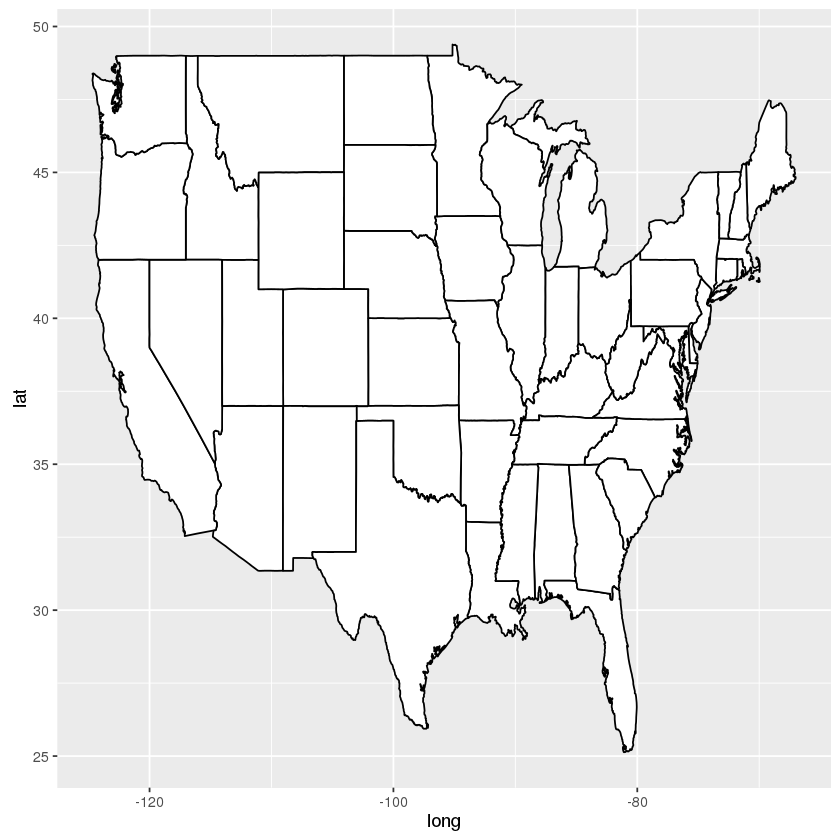

In [7]:
ggplot(statesMap, aes(x = long, y = lat, group = group)) + geom_polygon(fill = "white", color = "black")



In [8]:
polling = read.csv("PollingImputed.csv")

In [9]:
str(polling)

'data.frame':	145 obs. of  7 variables:
 $ State     : Factor w/ 50 levels "Alabama","Alaska",..: 1 1 2 2 3 3 3 4 4 4 ...
 $ Year      : int  2004 2008 2004 2008 2004 2008 2012 2004 2008 2012 ...
 $ Rasmussen : int  11 21 19 16 5 5 8 7 10 13 ...
 $ SurveyUSA : int  18 25 21 18 15 3 5 5 7 21 ...
 $ DiffCount : int  5 5 1 6 8 9 4 8 5 2 ...
 $ PropR     : num  1 1 1 1 1 ...
 $ Republican: int  1 1 1 1 1 1 1 1 1 1 ...


In [10]:
table(polling$Year)


2004 2008 2012 
  50   50   45 

In [11]:
Train = subset(polling, Year <= 2008)

In [13]:
Test = subset(polling, Year > 2008)

In [16]:
sum(table(Test$State)>0)

[1] 45

In [17]:
mod2 = glm(Republican~SurveyUSA+DiffCount, data = Train, family = binomial)

In [18]:
summary(mod2)


Call:
glm(formula = Republican ~ SurveyUSA + DiffCount, family = binomial, 
    data = Train)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.04741  -0.00977   0.00561   0.03751   1.32999  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept)  -0.6827     1.0468  -0.652   0.5143  
SurveyUSA     0.3309     0.2226   1.487   0.1371  
DiffCount     0.6619     0.3663   1.807   0.0708 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 138.269  on 99  degrees of freedom
Residual deviance:  11.154  on 97  degrees of freedom
AIC: 17.154

Number of Fisher Scoring iterations: 9


In [19]:
TestPrediction = predict(mod2, newdata = Test, type = "response")

In [20]:
TestPredictionBinary = as.numeric(TestPrediction>0.5)

In [21]:
predictionDataFrame = data.frame(TestPrediction,TestPredictionBinary,Test$State)

In [22]:
str(predictionDataFrame)

'data.frame':	45 obs. of  3 variables:
 $ TestPrediction      : num  9.74e-01 9.99e-01 9.26e-05 9.43e-03 3.43e-05 ...
 $ TestPredictionBinary: num  1 1 0 0 0 1 1 0 1 0 ...
 $ Test.State          : Factor w/ 50 levels "Alabama","Alaska",..: 3 4 5 6 7 9 10 11 12 13 ...


In [24]:
sum(TestPredictionBinary == TRUE)

[1] 22

In [25]:
mean(TestPrediction)

[1] 0.4852626

In [26]:
predictionDataFrame$region = tolower(predictionDataFrame$Test.State)

In [27]:
predictionMap = merge(statesMap,predictionDataFrame, by = "region")

In [28]:
str(predictionMap)

'data.frame':	15034 obs. of  9 variables:
 $ region              : chr  "arizona" "arizona" "arizona" "arizona" ...
 $ long                : num  -114 -114 -114 -114 -112 ...
 $ lat                 : num  37 37 36.8 37 37 ...
 $ group               : num  2 2 2 2 2 2 2 2 2 2 ...
 $ order               : int  240 241 238 239 248 249 250 251 252 253 ...
 $ subregion           : chr  NA NA NA NA ...
 $ TestPrediction      : num  0.974 0.974 0.974 0.974 0.974 ...
 $ TestPredictionBinary: num  1 1 1 1 1 1 1 1 1 1 ...
 $ Test.State          : Factor w/ 50 levels "Alabama","Alaska",..: 3 3 3 3 3 3 3 3 3 3 ...


In [29]:
predictionMap=predictionMap[order(predictionMap$order),]

In [30]:
str(predictionMap)

'data.frame':	15034 obs. of  9 variables:
 $ region              : chr  "arizona" "arizona" "arizona" "arizona" ...
 $ long                : num  -115 -115 -115 -115 -115 ...
 $ lat                 : num  35 35.1 35.1 35.2 35.2 ...
 $ group               : num  2 2 2 2 2 2 2 2 2 2 ...
 $ order               : int  204 205 206 207 208 209 210 211 212 213 ...
 $ subregion           : chr  NA NA NA NA ...
 $ TestPrediction      : num  0.974 0.974 0.974 0.974 0.974 ...
 $ TestPredictionBinary: num  1 1 1 1 1 1 1 1 1 1 ...
 $ Test.State          : Factor w/ 50 levels "Alabama","Alaska",..: 3 3 3 3 3 3 3 3 3 3 ...


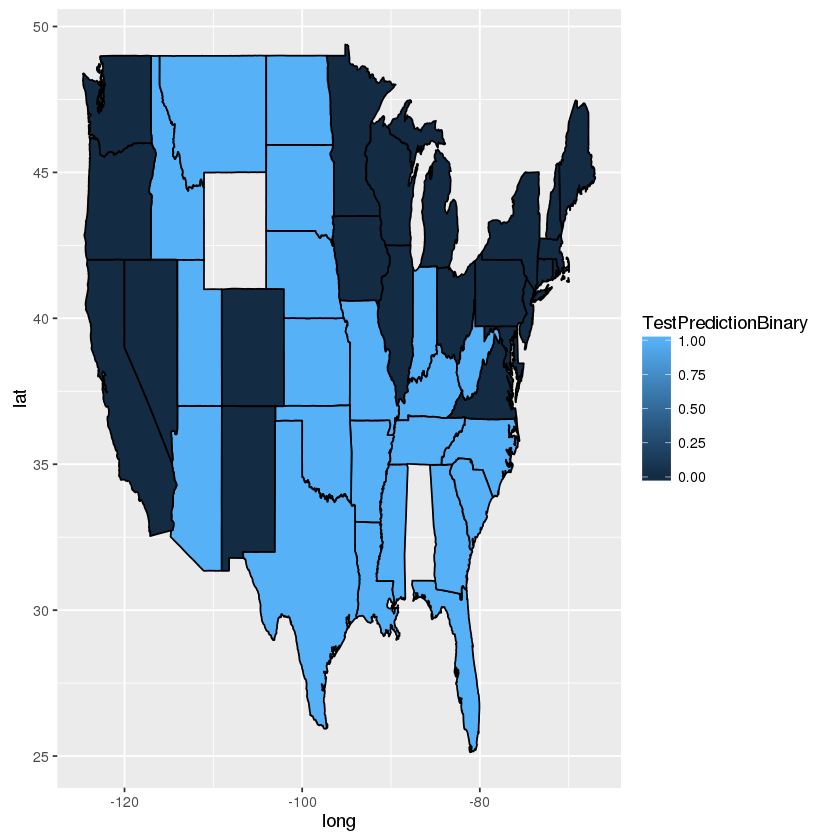

In [33]:
ggplot(predictionMap,aes(x=long,y=lat,group=group, fill = TestPredictionBinary))+geom_polygon(color = "black")

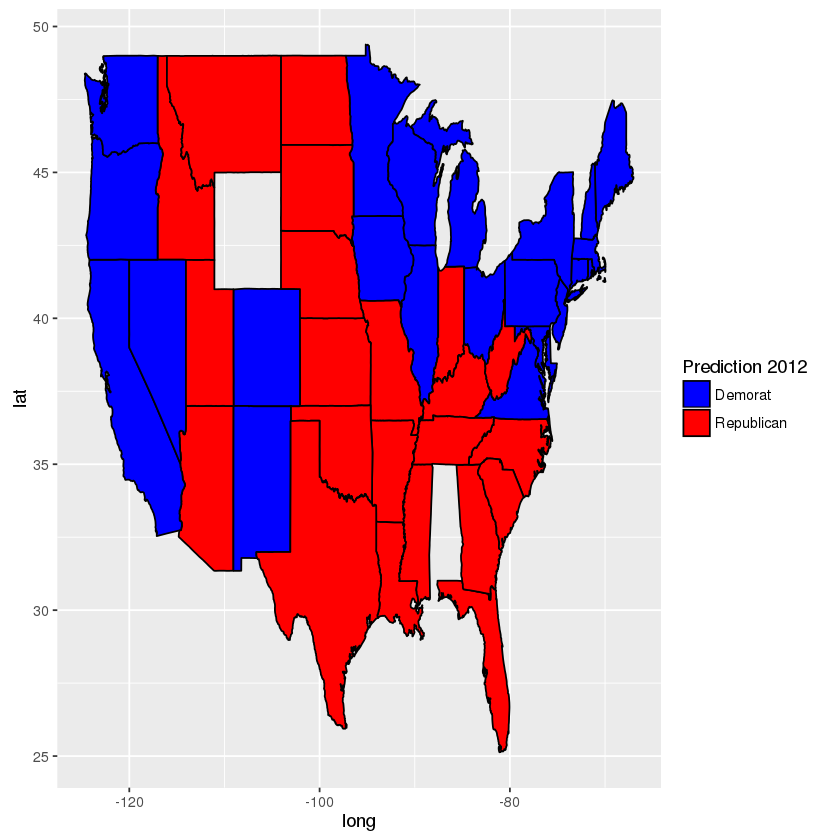

In [36]:
ggplot(predictionMap,aes(x=long,y=lat,group=group, fill = TestPredictionBinary))+
geom_polygon(color = "black")+
scale_fill_gradient(low="blue",high="red",guide="legend", 
                    breaks = c(0,1),labels =c("Demorat","Republican"), name ="Prediction 2012" )

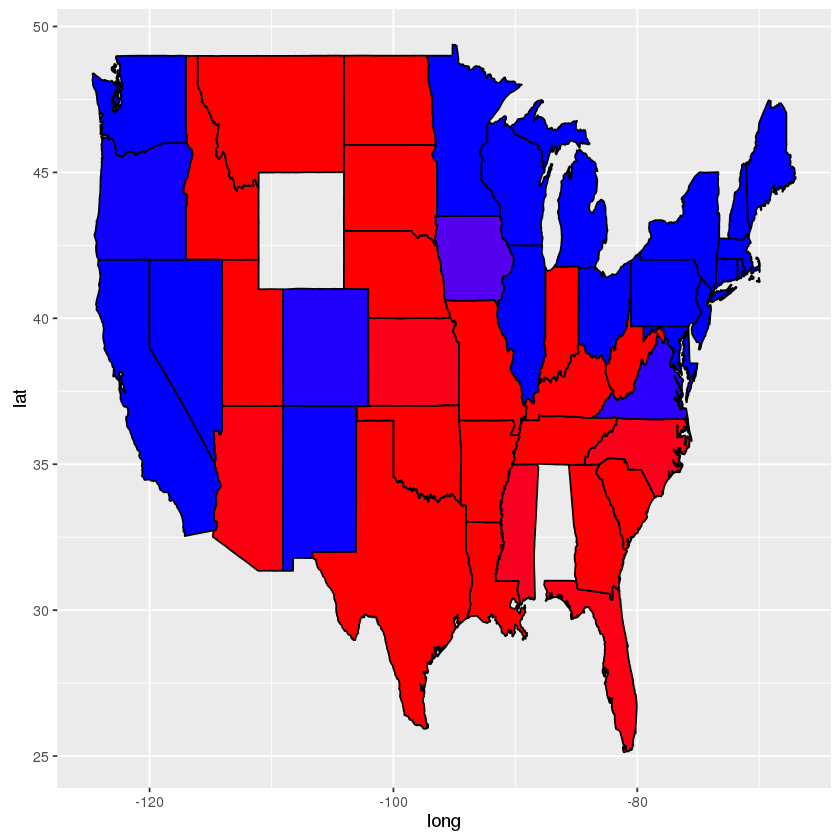

In [37]:
ggplot(predictionMap,aes(x=long,y=lat,group=group, fill = TestPrediction))+
geom_polygon(color = "black")+
scale_fill_gradient(low="blue",high="red",guide="legend",
                    breaks = c(0,1),labels =c("Demorat","Republican"), name ="Prediction 2012" )

In [40]:
TestPrediction[which(Test$State=="Florida")]

24 
0.9640395

In [41]:
?geom_polygon

geom_polygon {ggplot2},R Documentation
mapping,"Set of aesthetic mappings created by aes or aes_. If specified and inherit.aes = TRUE (the default), it is combined with the default mapping at the top level of the plot. You must supply mapping if there is no plot mapping."
data,"The data to be displayed in this layer. There are three options: If NULL, the default, the data is inherited from the plot data as specified in the call to ggplot. A data.frame, or other object, will override the plot data. All objects will be fortified to produce a data frame. See fortify for which variables will be created. A function will be called with a single argument, the plot data. The return value must be a data.frame., and will be used as the layer data."
stat,"The statistical transformation to use on the data for this layer, as a string."
position,"Position adjustment, either as a string, or the result of a call to a position adjustment function."
...,"other arguments passed on to layer. These are often aesthetics, used to set an aesthetic to a fixed value, like color = ""red"" or size = 3. They may also be parameters to the paired geom/stat."
na.rm,"If FALSE (the default), removes missing values with a warning. If TRUE silently removes missing values."
show.legend,"logical. Should this layer be included in the legends? NA, the default, includes if any aesthetics are mapped. FALSE never includes, and TRUE always includes."
inherit.aes,"If FALSE, overrides the default aesthetics, rather than combining with them. This is most useful for helper functions that define both data and aesthetics and shouldn't inherit behaviour from the default plot specification, e.g. borders."


In [42]:
?linetype

aes_linetype_size_shape {ggplot2},R Documentation


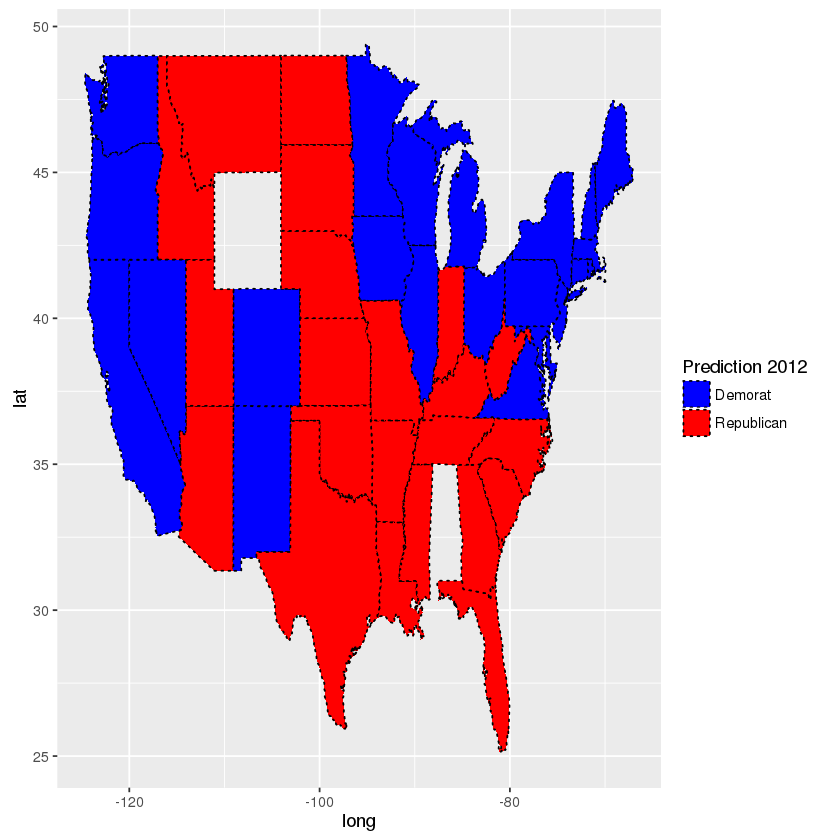

In [44]:
ggplot(predictionMap,aes(x=long,y=lat,group=group, fill = TestPredictionBinary))+
geom_polygon(color = "black",linetype=3)+
scale_fill_gradient(low="blue",high="red",guide="legend", 
                    breaks = c(0,1),labels =c("Demorat","Republican"), name ="Prediction 2012" )

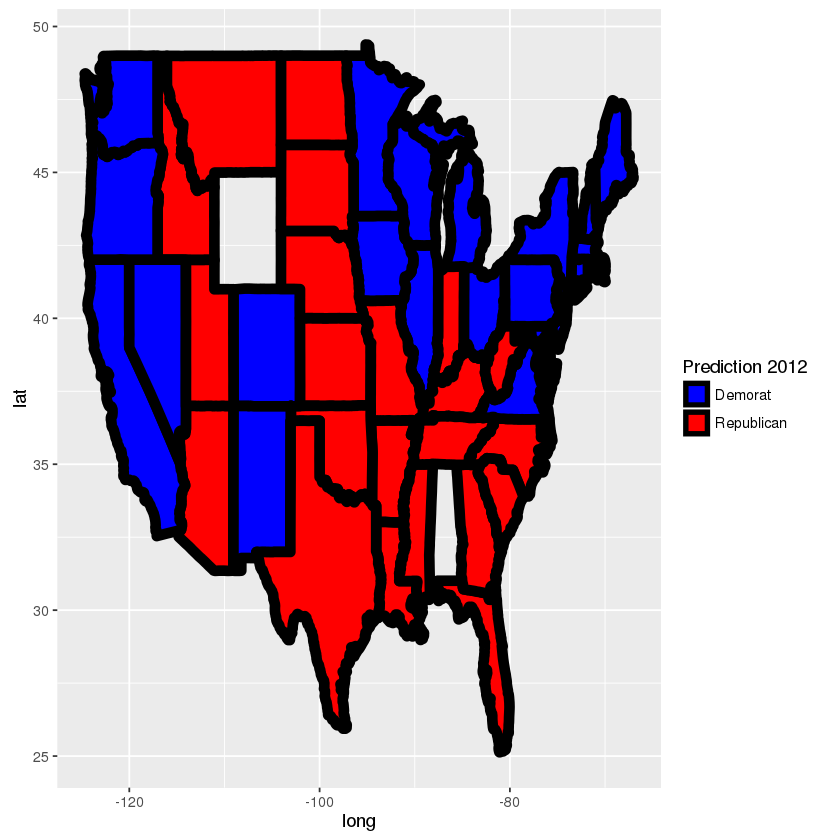

In [45]:
ggplot(predictionMap,aes(x=long,y=lat,group=group, fill = TestPredictionBinary))+
geom_polygon(color = "black",size=3)+
scale_fill_gradient(low="blue",high="red",guide="legend", 
                    breaks = c(0,1),labels =c("Demorat","Republican"), name ="Prediction 2012" )

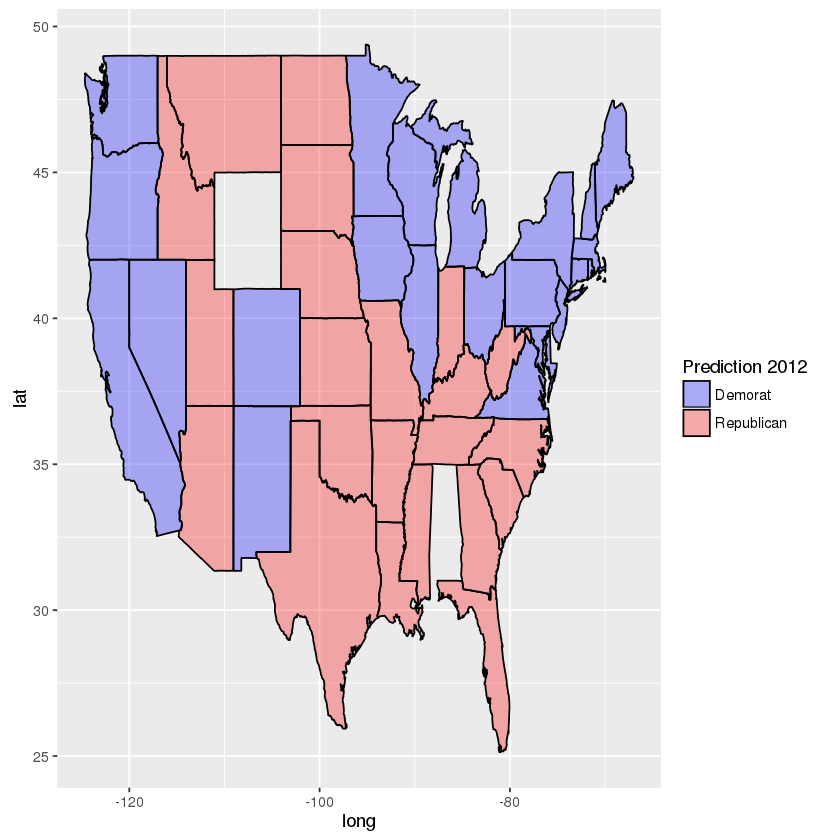

In [46]:
ggplot(predictionMap,aes(x=long,y=lat,group=group, fill = TestPredictionBinary))+
geom_polygon(color = "black",alpha=0.3)+
scale_fill_gradient(low="blue",high="red",guide="legend", 
                    breaks = c(0,1),labels =c("Demorat","Republican"), name ="Prediction 2012" )